<a href="https://colab.research.google.com/github/JustmeLu/Aprendizaje-Automatico/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [262]:
# Paquetes necesarios
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [263]:

# 1. Cargar el dataset
df = pd.read_csv("drug200.csv")

# 2. Mostrar algunos datos
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [264]:
# 3. Descripción de los datos
df.describe()


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [275]:
# 4. Seleccionar variables predictoras (excluir 'Drug')
X = df.drop('Drug', axis=1)

# 5. Codificación One-Hot para variables categóricas
X_encoded = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# 6. Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print("Dimensiones después del preprocesamiento:", X_scaled.shape)


Dimensiones después del preprocesamiento: (200, 6)


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


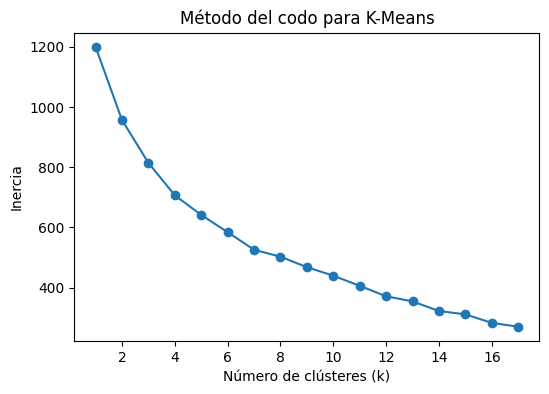

In [266]:
# Método del codo
inertia = []

K = range(1, 10)
for k in K:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(X_scaled)
    inertia.append(modelo.inertia_)

# Gráfica del codo
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para K-Means')
plt.show()

Aunque se observa una disminución progresiva de la inercia a medida que aumenta el número de clústeres, el cambio más notorio en la pendiente de la curva la puedo identificar alrededor de k = 7. A partir de este punto, la reducción de la inercia es menor.

Esto indica que agregar más clústeres ya no mejora la compacidad de los grupos.


---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [267]:
# 1. Entrenar el modelo K-Means
k = 7
modelo = KMeans(n_clusters=k, random_state=42)
modelo.fit(X_scaled)

# 2. Asignar etiquetas de clúster
labels = modelo.labels_

# 3. Agregar los clústeres al DataFrame original
data = df.copy()
data['Cluster'] = ['C' + str(c) for c in labels]

# Mostrar primeros registros
data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
0,23,F,HIGH,HIGH,25.355,DrugY,C10
1,47,M,LOW,HIGH,13.093,drugC,C3
2,47,M,LOW,HIGH,10.114,drugC,C3
3,28,F,NORMAL,HIGH,7.798,drugX,C2
4,61,F,LOW,HIGH,18.043,DrugY,C3


In [268]:
#Cantidad de elementos por clúster
data['Cluster'].value_counts()


,count
Cluster,
C3,26
C10,20
C11,19
C2,18
C0,18
C9,17
C8,17
C5,16
C1,13


In [269]:
#Media de cada grupo
numeric_cols = ['Age', 'Na_to_K']

data.groupby('Cluster')[numeric_cols].mean()


,Age,Na_to_K
Cluster,,
C0,44.166667,12.554778
C1,45.923077,16.043231
C10,29.000000,25.805600
C11,48.210526,17.417368
C2,45.166667,13.371167
C3,46.423077,13.254615
C4,47.818182,26.222000
C5,45.562500,11.927375
C6,45.333333,14.540833


In [270]:
#Mínimo y máximo de cada grupo
data.groupby('Cluster')[numeric_cols].agg(['min', 'max'])

Age     Na_to_K        
        min max     min     max
Cluster                        
C0       15  74   6.269  20.932
C1       19  73  10.977  25.475
C10      15  65  15.516  37.188
C11      26  74   8.370  33.542
C2       22  73   7.477  20.489
C3       16  72   6.769  22.963
C4       28  74  18.739  38.247
C5       20  72   7.340  15.490
C6       18  68   6.683  27.050
C7       15  63   9.084  31.686
C8       23  74   7.490  27.826
C9       17  67   7.261  16.594

In [271]:
for cluster in sorted(data['Cluster'].unique()):
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C0: cantidad de elementos 18


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
36,32,M,HIGH,NORMAL,9.445,drugA,C0
56,65,M,HIGH,NORMAL,11.340,drugB,C0
61,24,M,HIGH,NORMAL,9.475,drugA,C0
74,31,M,HIGH,NORMAL,17.069,DrugY,C0
91,41,M,HIGH,NORMAL,15.156,DrugY,C0


Cluster C1: cantidad de elementos 13


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
46,37,F,HIGH,HIGH,13.091,drugA,C1
50,58,F,HIGH,HIGH,19.416,DrugY,C1
64,60,F,HIGH,HIGH,13.303,drugB,C1
76,36,F,HIGH,HIGH,11.198,drugA,C1
78,19,F,HIGH,HIGH,13.313,drugA,C1


Cluster C10: cantidad de elementos 20


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
0,23,F,HIGH,HIGH,25.355,DrugY,C10
11,34,F,HIGH,NORMAL,19.199,DrugY,C10
15,16,F,HIGH,NORMAL,15.516,DrugY,C10
19,32,F,HIGH,NORMAL,25.974,DrugY,C10
25,28,F,HIGH,NORMAL,18.809,DrugY,C10


Cluster C11: cantidad de elementos 19


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
9,43,M,LOW,NORMAL,19.368,DrugY,C11
16,69,M,LOW,NORMAL,11.455,drugX,C11
20,57,M,LOW,NORMAL,19.128,DrugY,C11
22,47,M,LOW,NORMAL,30.568,DrugY,C11
32,49,M,LOW,NORMAL,11.014,drugX,C11


Cluster C2: cantidad de elementos 18


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
3,28,F,NORMAL,HIGH,7.798,drugX,C2
5,22,F,NORMAL,HIGH,8.607,drugX,C2
6,49,F,NORMAL,HIGH,16.275,DrugY,C2
14,50,F,NORMAL,HIGH,12.703,drugX,C2
40,73,F,NORMAL,HIGH,19.221,DrugY,C2


Cluster C3: cantidad de elementos 26


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
1,47,M,LOW,HIGH,13.093,drugC,C3
2,47,M,LOW,HIGH,10.114,drugC,C3
4,61,F,LOW,HIGH,18.043,DrugY,C3
7,41,M,LOW,HIGH,11.037,drugC,C3
10,47,F,LOW,HIGH,11.767,drugC,C3


Cluster C4: cantidad de elementos 11


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
13,74,F,LOW,HIGH,20.942,DrugY,C4
24,33,F,LOW,HIGH,33.486,DrugY,C4
28,39,F,LOW,NORMAL,22.697,DrugY,C4
49,28,F,LOW,HIGH,19.796,DrugY,C4
60,38,F,LOW,NORMAL,29.875,DrugY,C4


Cluster C5: cantidad de elementos 16


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
41,58,F,HIGH,NORMAL,14.239,drugB,C5
54,68,F,HIGH,NORMAL,10.189,drugB,C5
79,32,F,LOW,NORMAL,10.840,drugX,C5
83,38,F,HIGH,NORMAL,11.326,drugA,C5
113,65,F,LOW,NORMAL,13.769,drugX,C5


Cluster C6: cantidad de elementos 12


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
27,49,F,NORMAL,NORMAL,9.381,drugX,C6
30,18,F,NORMAL,NORMAL,8.750,drugX,C6
38,39,F,NORMAL,NORMAL,9.709,drugX,C6
44,50,F,NORMAL,NORMAL,12.295,drugX,C6
45,66,F,NORMAL,NORMAL,8.107,drugX,C6


Cluster C7: cantidad de elementos 13


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
21,63,M,NORMAL,HIGH,25.917,DrugY,C7
26,31,M,HIGH,HIGH,30.366,DrugY,C7
39,15,M,NORMAL,HIGH,9.084,drugX,C7
43,23,M,NORMAL,HIGH,12.260,drugX,C7
48,23,M,NORMAL,HIGH,31.686,DrugY,C7


Cluster C8: cantidad de elementos 17


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
17,43,M,HIGH,HIGH,13.972,drugA,C8
31,74,M,HIGH,HIGH,9.567,drugB,C8
57,40,M,HIGH,HIGH,27.826,DrugY,C8
59,34,M,HIGH,HIGH,18.703,DrugY,C8
66,29,M,HIGH,HIGH,12.856,drugA,C8


Cluster C9: cantidad de elementos 17


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
8,60,M,NORMAL,HIGH,15.171,DrugY,C9
34,53,M,NORMAL,HIGH,14.133,drugX,C9
35,46,M,NORMAL,NORMAL,7.285,drugX,C9
42,50,M,NORMAL,NORMAL,15.790,DrugY,C9
51,67,M,NORMAL,NORMAL,10.898,drugX,C9


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**Cluster C0 – Adultos con presión alta y Na/K bajo–medio**

En este grupo podemos encontrar  a personas que en promoedio estan en la de edad de 51 años, por lo que son adultos y adultos mayores, son pacientes que tienen la presion arterial alta.

**Cluster C1 – Adultos mayores con presión y colesterol altos**

en este grupo podmeos encontrar a personas con una edad proemdio igual de 51 años pero que se encuentran en peligro ya que se encuentran con presion arterial y colesterol eleveado.

**Cluster C2 – Adultos con presión baja y Na/K elevado**

En este grupo se encuentran personas que d eigual manera nenecitan atencion ya que tiene la presion baja  y Relación sodio/potasio medio-alta

**Cluster C3 – Adultos jóvenes con presión normal y colesterol alto**

en este grupo podmeos encontrar pacientes con una edad promedio de 43 años que presentan colesterol elevado sin alteraciones claras en la presión.

**Cluster C4 – Adultos con presión baja y colesterol alto**

este grupo tiene una edad promedio de 47 años que necesitan bastante cuidado ya que tiene la presion baja y su colesterol alto

**Cluster C5 – Adultos con presión y colesterol normales**

 son pacientes en unad promedio de 46 años con un perfil clinico estable ya que su  presion y su colestarol estan normales

**Cluster C6 – Jóvenes con Na/K alto y presión alta**

en este grupo se encuentran personas ams jovenes con un promedio de edad de 27 años que tienen presion alta un colesterol normal a alto y un Na/K elevado

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

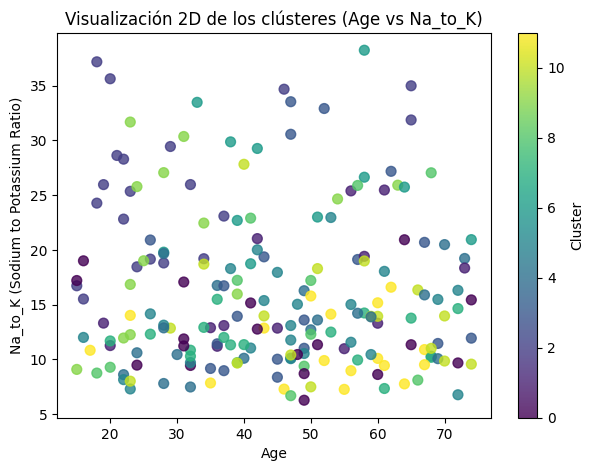

In [272]:
plt.figure(figsize=(7, 5))

# Scatter plot
plt.scatter(
    data['Age'],
    data['Na_to_K'],
    c=data['Cluster'].astype('category').cat.codes,
    s=50,
    alpha=0.8
)

plt.xlabel('Age')
plt.ylabel('Na_to_K (Sodium to Potassium Ratio)')
plt.title('Visualización 2D de los clústeres (Age vs Na_to_K)')
plt.colorbar(label='Cluster')
plt.show()


En la visualización 2D de los clústeres se observa una alta dispersión de los puntos. Esto indica que los clústeres no presentan una separación clara cuando se analizan únicamente dos variables

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

Varianza explicada por Componente 1: 25.44%
Varianza explicada por Componente 2: 20.38%
Varianza explicada total: 45.82%


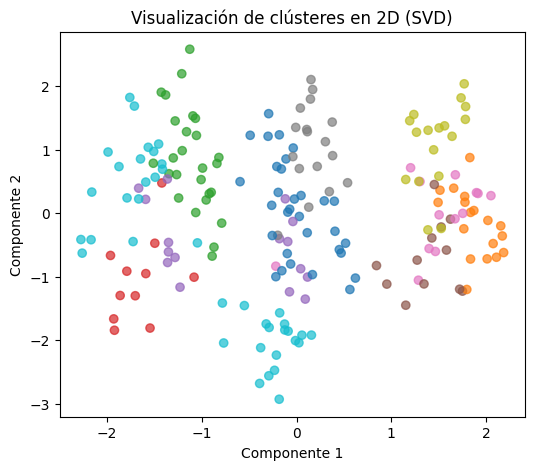

In [273]:
# Aplicar SVD a 2 componentes
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Imprimir la varianza explicada por cada componente
print(f"Varianza explicada por Componente 1: {svd.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada por Componente 2: {svd.explained_variance_ratio_[1]:.2%}")
print(f"Varianza explicada total: {svd.explained_variance_ratio_.sum():.2%}")

# Gráfica
plt.figure(figsize=(6,5))
plt.scatter(
    X_svd[:, 0],
    X_svd[:, 1],
    c=labels,
    cmap='tab10',
    alpha=0.7
)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización de clústeres en 2D (SVD)')
plt.show()

Para la visualización en 2D se utilizó la descomposición en valores singulares (SVD) como técnica de reducción de dimensionalidad. Las dos primeras componentes explican aproximadamente el 46% de la varianza total del conjunto de datos. En la gráfica se observa que los clústeres presentan una dispersión considerable y un solapamiento entre grupos, lo que dificulta una separación clara. La varianza explicada relativamente baja indica que una parte importante de la información se pierde al proyectar los datos en dos dimensiones, lo cual afecta la claridad de la visualización

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [277]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg:.3f}")

El coeficiente de silueta promedio es: 0.316


El coeficiente de silueta promedio obtenido fue de 0.265, lo que indica que los grupos formados presentan una separación limitada. Aunque el modelo logra identificar patrones generales en los datos, los clústeres muestran una considerable superposición, por lo que la calidad del agrupamiento puede considerarse moderada a baja.